# chemical maps

This notebooks has simple workflows with chemical X-ray data obtained with an electron probe microanalyzer (EMPA), with both EDS (energy-dispersive) and WDS (wavelength-dispersive) spectometers. 

Data is from a high-grade _crd-grt granulite with spl-sill_ from the **Araçuaí Orogen**, SE Brazil. Full description of this sample is described by Schiavetti _et al._ (2025).

Worklows are:
* load and display individual X-ray maps
* train a machine-learning model to classify minerals
* load mineral chemistry standards and use a cluster algorithm to classify all pixels

Classes
* XrayMap

---

to do
* read and review
* setup analysis


#### setup

In [1]:
# importing libs
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# utils
from src.xraymap import XrayMap # map Class
from src.utils import get_dirs # function that reads directories

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

In [2]:
# loading dirs that might be used
get_dirs()

{'SOURCE_DIR': '/home/orogen/code/xmapy',
 'DATA_DIR': '/home/orogen/code/xmapy/data',
 'FIGS_DIR': '/home/orogen/code/xmapy/figs',
 'QUERY_DIR': '/home/orogen/code/xmapy/queries',
 'PLOT_DIR': '/home/orogen/code/xmapy/plots'}

In [3]:
# setting up plots
plt.rcParams["figure.figsize"] = (16,8)

### analysis

In [5]:
# using Al as an example

element = "Al"
al_map = XrayMap(element=element)
print("We created: ", al_map, "!")

Al.csv found!
We created:  <src.xraymap.XrayMap object at 0x7f95eca19c40> !


Al


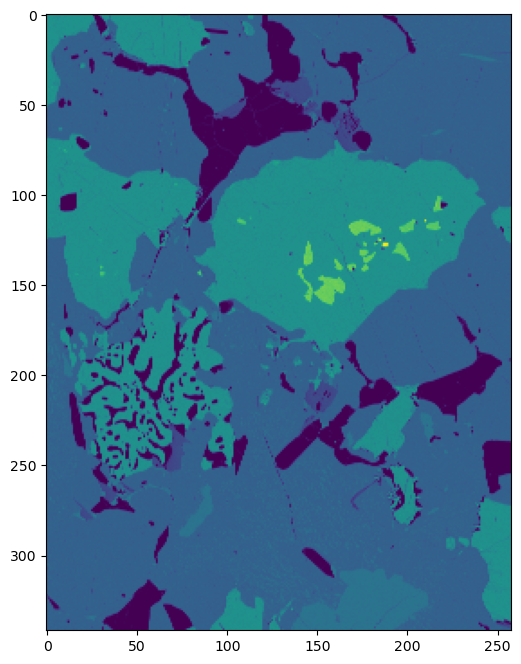

In [6]:
al_map.show_map()

**loading specific maps using our class**

In [ ]:
# load X-Ray maps

def load_maps(elements):
 
  maps = []
  for el in elements:
    try:
      # print('{a}.csv'.format(a=el))
      map_el = XrayMap(element=el)
      maps.append(map_el)
    
    except:
      print("error loading map")
  
  for x in maps:
    x.xray_data = x.data.to_numpy().astype(np.float32) / 255.0

  return maps

In [ ]:
ELEMENTS = ["Al","Ba","Ca","Cl","Cr","Fe","K","Mg","Mn","Mn","Na","P","S","Si","Ti","Zn","Zr"]
all_maps = load_maps(ELEMENTS)

Cl


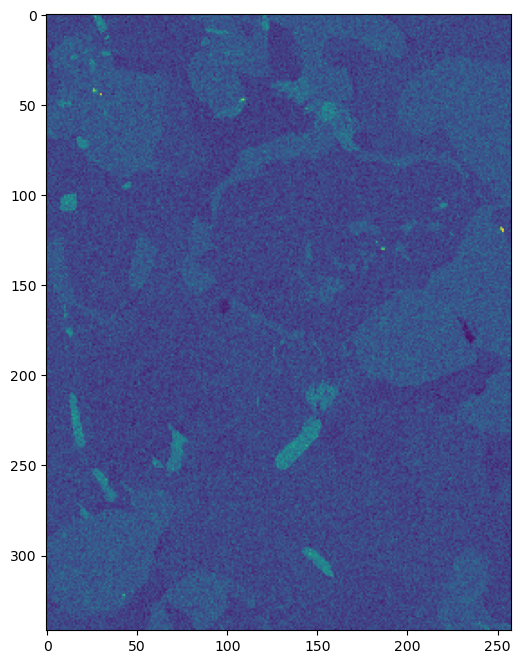

In [41]:
all_maps[3].show_map()

### Machine Learning

#### A | classifying a mineral based on the information from sample pixels

rationale:
* with X-ray maps, we can stack information and get a combination of intesities for each pixel
* then, we can 
1. 

In [ ]:
df_al = 

In [ ]:
np.stack([df_Al, df_Fe], axis=-1).shape

In [ ]:
df_al_fe = np.stack([df_Al, df_Fe, df_Mg, df_Si, true_grt], axis=-1)
print(df_al_fe.shape)

In [ ]:
df_good = pd.DataFrame(df_al_fe.reshape(-1, df_al_fe.shape[-1]), columns=["Al","Fe","Mg","Si", "flGrt"])
df_good_labeled = df_good[df_good.flGrt == 1]


* ML

In [ ]:
# creating a fake mask to 

true_grt = np.zeros(maps_np[0].shape)
true_grt[50:70,220:255] = 1
plt.imshow(true_grt)
plt.show()

In [ ]:
X = df_good_labeled[["Al", "Fe", "Mg", "Si"]]
y = df_good_labeled["flGrt"].astype(int)

model = LogisticRegression()
model_forest = IsolationForest()
model_forest.fit(X)

In [ ]:
df_to_predict = df_good.drop(columns=["flGrt"], inplace=False)

In [ ]:
plt.imshow(model_forest.predict(df_to_predict).reshape(342, 258))